In [1116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

In [1117]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [1118]:
df= pd.read_csv('brief_assurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [1119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [1120]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

selon les descriptions stastique, nous n'avons pas constacte les valeur aberrants ou manquantes. pour max bmi de 53.13 correspondre a un homme de 180cm et 170kg. reste une valeur non aberrants. même conculusion pour nombre d'enfants et age .
donc notre dataframe est prêt à emplois

In [1121]:
df["children"] = df["children"].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   object 
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ KB


In [1122]:
X=df.drop('charges',axis=1)
y=df['charges']

In [1123]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [1124]:
quantitative_col = list(X.select_dtypes(include=[float,int]).columns)
categoriel_col = list(X.select_dtypes(include=[object]).columns)

In [1125]:
quantitative_pipeline = make_pipeline(StandardScaler(),PolynomialFeatures())

In [1126]:
categoriel_col

['sex', 'children', 'smoker', 'region']

In [1127]:
preprocessing=ColumnTransformer([("one_hot",OneHotEncoder(),categoriel_col),("scaling",quantitative_pipeline,quantitative_col)])

In [1128]:
preprocessing

ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                 ['sex', 'children', 'smoker', 'region']),
                                ('scaling',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('polynomialfeatures',
                                                  PolynomialFeatures())]),
                                 ['age', 'bmi'])])

In [1129]:
my_pipe_lr = make_pipeline(preprocessing, LinearRegression())

In [1130]:
my_pipe_lasso = make_pipeline(preprocessing, Lasso())

In [1131]:
my_pipe_lasso.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                    ['sex', 'children', 'smoker', 'region']),
                                   ('scaling',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('polynomialfeatures',
                                                     PolynomialFeatures())]),
                                    ['age', 'bmi'])])),
  ('lasso', Lasso())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                  ['sex', 'children', 'smoker', 'region']),
                                 ('scaling',
                                  Pipeline(steps=[('standardscaler',
                                                   StandardScaler()),
                        

In [1132]:
my_pipe_lr = make_pipeline(preprocessing, LinearRegression())

In [1133]:
my_pipe_lasso = make_pipeline(preprocessing, Lasso(alpha=4.9))

In [1134]:
my_pipe_ridge= make_pipeline(preprocessing, Ridge(alpha=0.1))

In [1135]:
my_pipe_elasticnet= make_pipeline(preprocessing, ElasticNet(alpha= 0.2, l1_ratio= 0.9))

In [1136]:
my_pipe_lr.fit(X_train, y_train)
my_pipe_lr.score(X_test, y_test)

0.7061200189212493

In [1137]:
my_pipe_lasso.fit(X_train, y_train)
my_pipe_lasso.score(X_test, y_test)

0.7088585228523623

In [1138]:
my_pipe_ridge.fit(X_train, y_train)
my_pipe_ridge.score(X_test, y_test)

0.708928635640794

In [1139]:
my_pipe_elasticnet.fit(X_train, y_train)
my_pipe_elasticnet.score(X_train, y_train)

0.7641791730510533

In [1140]:
y_pred = my_pipe_ridge.predict(X)
residual =(y_pred-y).abs().sort_values(ascending=False,)
residual

1300    30366.098852
577     25771.454230
543     24715.007161
219     24290.516828
242     24044.515249
            ...     
935        23.194361
501        15.252669
234        12.058547
363         6.564332
206         2.258626
Name: charges, Length: 1338, dtype: float64

In [1141]:
residual.info()

<class 'pandas.core.series.Series'>
Int64Index: 1338 entries, 1300 to 206
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1338 non-null   float64
dtypes: float64(1)
memory usage: 20.9 KB


In [1145]:
to_drop=residual[residual>15000].index

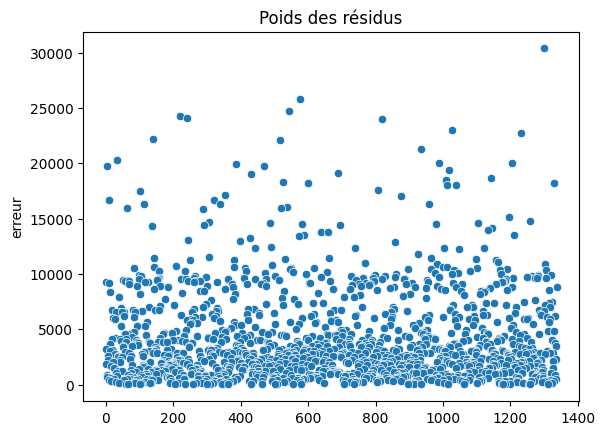

In [1144]:
sns.scatterplot(residual)
plt.title('Poids des résidus')
plt.ylabel('erreur')
plt.show()

In [1146]:
df[df.index.isin(to_drop)].describe()

,age,bmi,charges
count,41.000000,41.000000,41.000000
mean,39.146341,29.714268,31358.163255
std,14.860284,5.793299,12249.457854
min,18.000000,18.715000,18838.703660
25%,24.000000,25.365000,24059.680190
50%,44.000000,27.930000,27346.042070
75%,52.000000,33.330000,32108.662820
max,64.000000,47.410000,63770.428010


In [1147]:
to_drop

Int64Index([1300,  577,  543,  219,  242,  819, 1027, 1230,  140,  516,  936,
              34,  987, 1206,  387,  468,    3, 1019,  688,  430, 1142, 1008,
             526,  599, 1328, 1039, 1012,  806,  102,  355,  876,    9,  321,
             115,  959,  340,  539,  520,   62,  289, 1195],
           dtype='int64')

In [1148]:
df_cleaned=df.drop(to_drop)
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
4,32,male,28.88,0,no,northwest,3866.8552
5,31,female,25.74,0,no,southeast,3756.6216
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450


In [1149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   object 
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ KB


In [1150]:
X=df.drop('charges',axis=1)
y=df['charges']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)
quantitative_col = list(X.select_dtypes(include=[float,int]).columns)
categoriel_col = list(X.select_dtypes(include=[object]).columns)
quantitative_pipeline = make_pipeline(StandardScaler(),PolynomialFeatures())
preprocessing=ColumnTransformer([("one_hot",OneHotEncoder(),categoriel_col),("scaling",quantitative_pipeline,quantitative_col)])


In [1151]:
my_pipe_ridge.fit(X_train, y_train)
my_pipe_ridge.score(X_test, y_test)


0.7468774315140039

In [1152]:
my_pipe_lr.fit(X_train, y_train)
my_pipe_lr.score(X_test, y_test)

0.7470728062705199

meilleur score sans determine parametre alpha 0.765063644178095

In [1153]:
my_pipe_lasso.fit(X_train, y_train)
my_pipe_lasso.score(X_test, y_test)

0.7471855954546988

In [1154]:
my_pipe_elasticnet.fit(X_train, y_train)
my_pipe_elasticnet.score(X_train, y_train)

0.7551137102767869

In [ ]:
a

In [ ]:
import pickle 
pickle_out = open("my_pipe_ridge.pkl", "wb") 
pickle.dump(my_pipe_ridge, pickle_out) 
pickle_out.close()